In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('weatherHistory.csv')

# Specify the columns that you want to round to three decimal places
columns_to_round = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

# Round the specified columns
df[columns_to_round] = df[columns_to_round].round(3)

# Display the DataFrame with the rounded values
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.89,14.120,251.0,15.826,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.86,14.265,259.0,15.826,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.89,3.928,204.0,14.957,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.83,14.104,269.0,15.826,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.83,11.045,259.0,15.826,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# Convert the "Formatted Date" column to a datetime object without the timezone
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f', utc=True)

# Split the datetime into separate date and time columns
df['Date'] = df['Formatted Date'].dt.date
df['Time'] = df['Formatted Date'].dt.time

# Drop the original "Formatted Date" column
df = df.drop(columns=['Formatted Date'])

In [4]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Time
0,Partly Cloudy,rain,9.472,7.389,0.89,14.120,251.0,15.826,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31,22:00:00
1,Partly Cloudy,rain,9.356,7.228,0.86,14.265,259.0,15.826,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31,23:00:00
2,Mostly Cloudy,rain,9.378,9.378,0.89,3.928,204.0,14.957,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,00:00:00
3,Partly Cloudy,rain,8.289,5.944,0.83,14.104,269.0,15.826,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,01:00:00
4,Mostly Cloudy,rain,8.756,6.978,0.83,11.045,259.0,15.826,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,02:00:00


In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932680,10.855029,0.734899,10.810654,187.509232,10.347320,0.0,1003.235956
std,9.551545,10.696849,0.195473,6.913571,107.383428,4.192116,0.0,116.969906
min,-21.822000,-27.717000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.689000,2.311000,0.600000,5.828000,116.000000,8.340000,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.966000,180.000000,10.046000,0.0,1016.450000
75%,18.839000,18.839000,0.890000,14.136000,290.000000,14.812000,0.0,1021.090000
max,39.906000,39.344000,1.000000,63.853000,359.000000,16.100000,0.0,1046.380000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
 11  Date                      96453 non-null  object 
 12  Time                      96453 non-null  object 
dtypes: float64(8), object(5)
memory usage: 9.6+ MB


In [7]:
df.info

<bound method DataFrame.info of              Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0      Partly Cloudy        rain            9.472                     7.389   
1      Partly Cloudy        rain            9.356                     7.228   
2      Mostly Cloudy        rain            9.378                     9.378   
3      Partly Cloudy        rain            8.289                     5.944   
4      Mostly Cloudy        rain            8.756                     6.978   
...              ...         ...              ...                       ...   
96448  Partly Cloudy        rain           26.017                    26.017   
96449  Partly Cloudy        rain           24.583                    24.583   
96450  Partly Cloudy        rain           22.039                    22.039   
96451  Partly Cloudy        rain           21.522                    21.522   
96452  Partly Cloudy        rain           20.439                    20.439   

       Humidity  Wi

In [8]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary', 'Date', 'Time'],
      dtype='object')

In [9]:
#sum of null values
df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
Date                          0
Time                          0
dtype: int64

In [10]:
#Precip Type column unique values
df['Precip Type'].unique()


array(['rain', 'snow', nan], dtype=object)

In [11]:
#show 5 rows of the data with nan values
df[df.isnull().any(axis=1)].head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Time
52672,Mostly Cloudy,NaN,19.017,19.017,0.26,14.876,163.0,9.982,0.0,1002.40,Mostly cloudy until night.,2012-04-11,14:00:00
52674,Mostly Cloudy,NaN,17.850,17.850,0.28,13.798,169.0,9.982,0.0,1001.79,Mostly cloudy until night.,2012-04-11,16:00:00
52675,Mostly Cloudy,NaN,16.322,16.322,0.32,10.819,151.0,9.982,0.0,1001.60,Mostly cloudy until night.,2012-04-11,17:00:00
52677,Mostly Cloudy,NaN,12.567,12.567,0.43,9.016,159.0,9.982,0.0,1001.92,Mostly cloudy until night.,2012-04-11,19:00:00
52678,Mostly Cloudy,NaN,12.928,12.928,0.47,17.630,197.0,16.100,0.0,1002.20,Mostly cloudy until night.,2012-04-11,20:00:00


In [12]:
#fill nan from Precip Type column with "nothing"
df['Precip Type'].fillna("nothing", inplace = True)

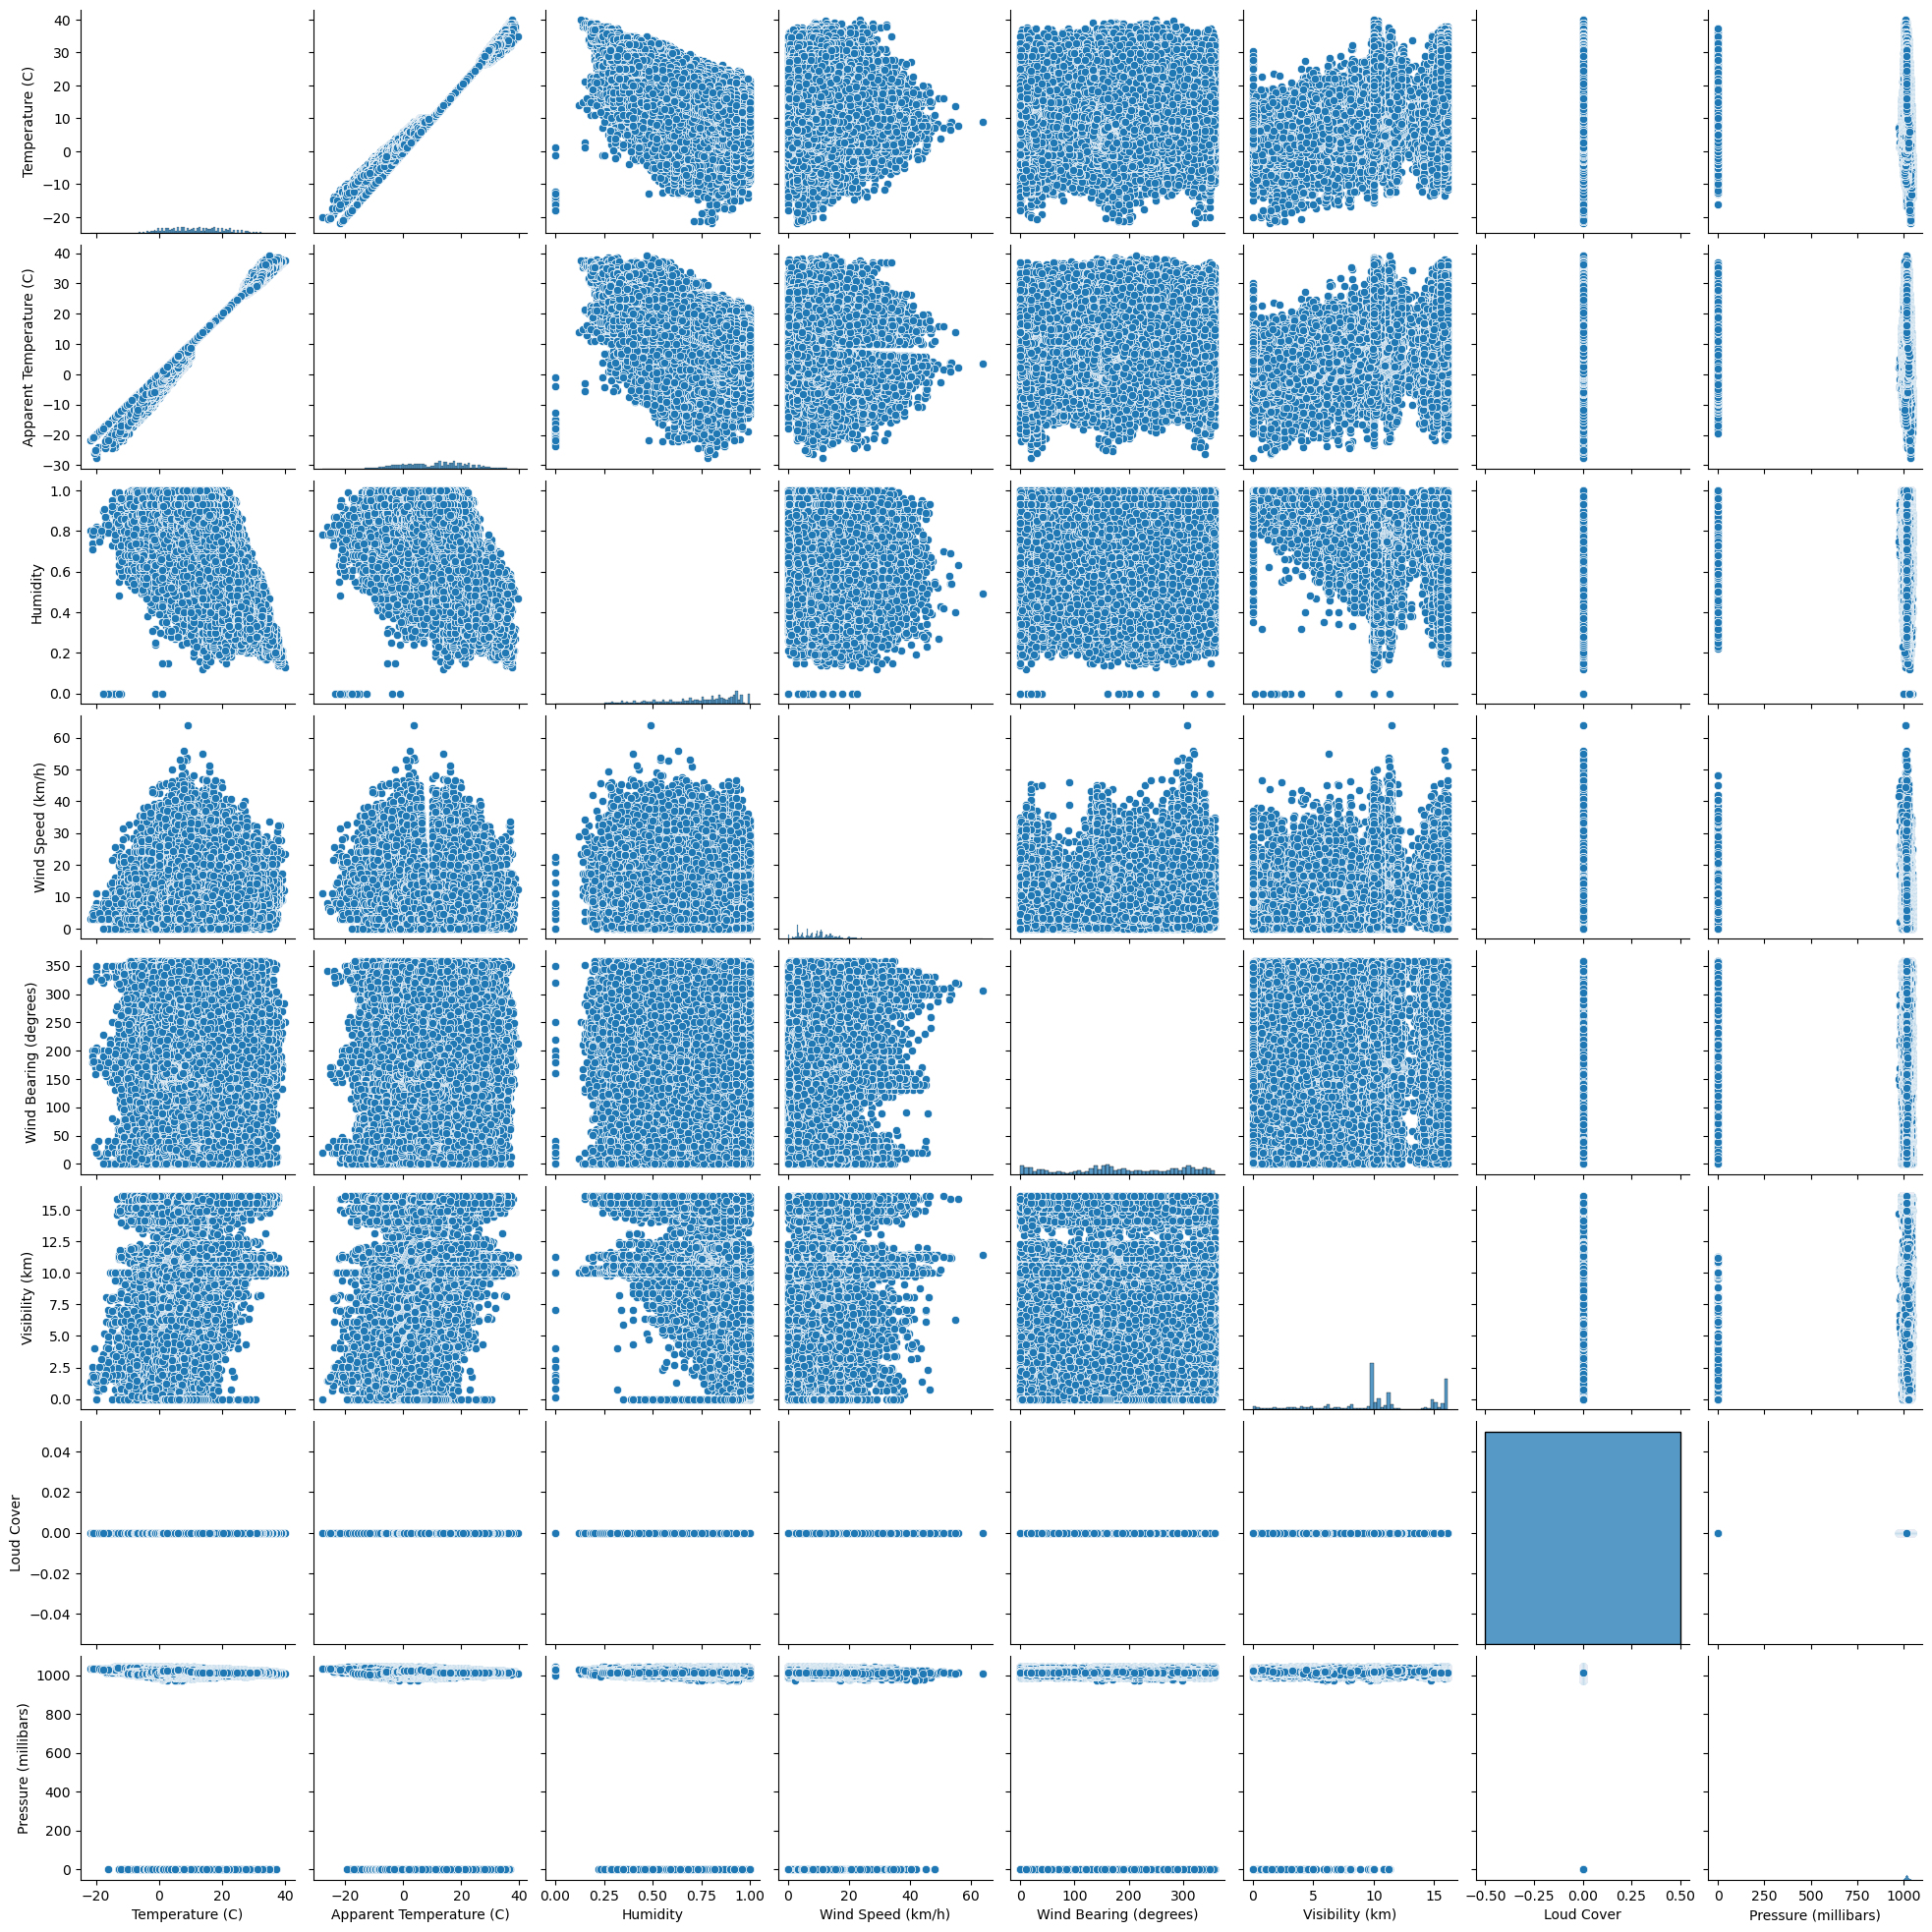

In [13]:
#pairplot
sns.pairplot(df)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_25028\2021191902.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature (C)'])


<AxesSubplot: xlabel='Temperature (C)', ylabel='Density'>

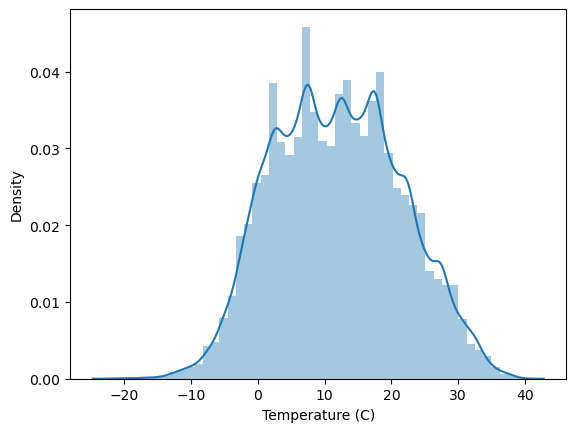

In [14]:
#data distribution of Temperature (C)
sns.distplot(df['Temperature (C)'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25028\140439037.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Apparent Temperature (C)'])


<AxesSubplot: xlabel='Apparent Temperature (C)', ylabel='Density'>

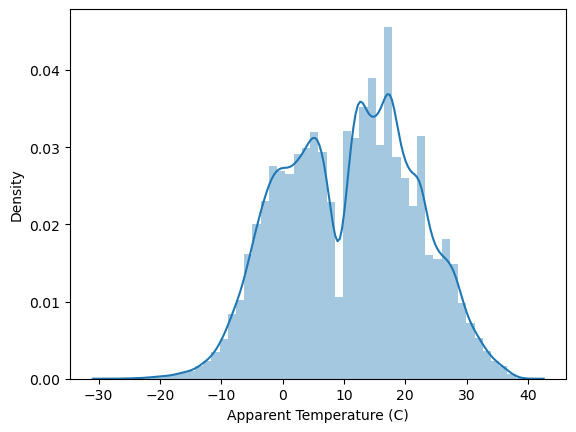

In [15]:
#data distribution of Apparent Temperature (C)
sns.distplot(df['Apparent Temperature (C)'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25028\3900665025.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature (C)'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_25028\3900665025.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Apparent Temperature (C)'])

<AxesSubplot: xlabel='Apparent Temperature (C)', ylabel='Density'>

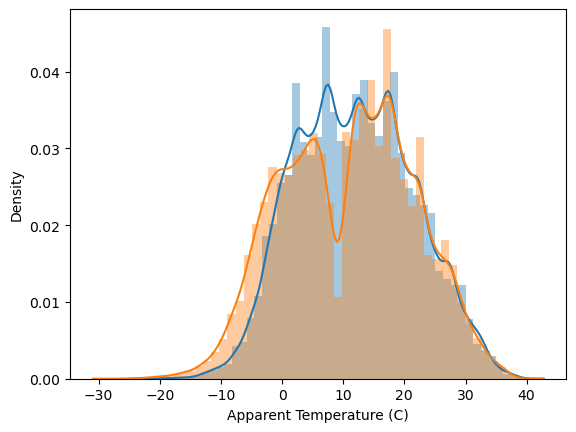

In [16]:
#comparison of Temperature (C) and Apparent Temperature (C) data distribution
sns.distplot(df['Temperature (C)'])
sns.distplot(df['Apparent Temperature (C)'])


In [17]:
#make a copy of the dataframe
df1 = df.copy()


In [18]:
#daily summary unique values
df['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [19]:
#drop date column
df1.drop(['Date'], axis = 1, inplace = True)

In [20]:
#change date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
#change time column to only have hours
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour


In [21]:
#list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Summary', 'Precip Type', 'Daily Summary']

In [22]:
#label encoding for categorical columns in df2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df1[col] = le.fit_transform(df1[col])
df1.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Time
0,19,1,9.472,7.389,0.89,14.120,251.0,15.826,0.0,1015.13,197,22:00:00
1,19,1,9.356,7.228,0.86,14.265,259.0,15.826,0.0,1015.63,197,23:00:00
2,17,1,9.378,9.378,0.89,3.928,204.0,14.957,0.0,1015.94,197,00:00:00
3,19,1,8.289,5.944,0.83,14.104,269.0,15.826,0.0,1016.41,197,01:00:00
4,17,1,8.756,6.978,0.83,11.045,259.0,15.826,0.0,1016.51,197,02:00:00


In [23]:
#loud cover column unique values
df['Loud Cover'].unique()
#drop loud cover column
df1.drop(['Loud Cover'], axis = 1, inplace = True)


In [25]:
#correration matrix
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Summary,1.000000,-0.106454,0.146658,0.142760,-0.113119,0.004258,0.022789,0.140140,0.143405,0.157569
Precip Type,-0.106454,1.000000,-0.542245,-0.545264,0.223896,-0.068319,-0.040390,-0.291998,0.006472,-0.235579
Temperature (C),0.146658,-0.542245,1.000000,0.992629,-0.632254,0.008957,0.029988,0.392845,-0.005447,0.438879
Apparent Temperature (C),0.142760,-0.545264,0.992629,1.000000,-0.602571,-0.056650,0.029030,0.381717,-0.000219,0.433791
Humidity,-0.113119,0.223896,-0.632254,-0.602571,1.000000,-0.224951,0.000735,-0.369171,0.005454,-0.368180
Wind Speed (km/h),0.004258,-0.068319,0.008957,-0.056650,-0.224951,1.000000,0.103821,0.100750,-0.049263,-0.004115
Wind Bearing (degrees),0.022789,-0.040390,0.029988,0.029030,0.000735,0.103821,1.000000,0.047594,-0.011651,0.053709
Visibility (km),0.140140,-0.291998,0.392845,0.381717,-0.369171,0.100750,0.047594,1.000000,0.059818,0.457911
Pressure (millibars),0.143405,0.006472,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000,0.054305
Daily Summary,0.157569,-0.235579,0.438879,0.433791,-0.368180,-0.004115,0.053709,0.457911,0.054305,1.000000


In [26]:
df1.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Time
0,19,1,9.472,7.389,0.89,14.120,251.0,15.826,1015.13,197,22:00:00
1,19,1,9.356,7.228,0.86,14.265,259.0,15.826,1015.63,197,23:00:00
2,17,1,9.378,9.378,0.89,3.928,204.0,14.957,1015.94,197,00:00:00
3,19,1,8.289,5.944,0.83,14.104,269.0,15.826,1016.41,197,01:00:00
4,17,1,8.756,6.978,0.83,11.045,259.0,15.826,1016.51,197,02:00:00


In [27]:
#make time be "22" instead of "22:00:00"
df1['Time'] = df1['Time'].astype(str).str[:-6].astype(np.int64)
df1.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Time
0,19,1,9.472,7.389,0.89,14.120,251.0,15.826,1015.13,197,22
1,19,1,9.356,7.228,0.86,14.265,259.0,15.826,1015.63,197,23
2,17,1,9.378,9.378,0.89,3.928,204.0,14.957,1015.94,197,0
3,19,1,8.289,5.944,0.83,14.104,269.0,15.826,1016.41,197,1
4,17,1,8.756,6.978,0.83,11.045,259.0,15.826,1016.51,197,2


In [28]:
#choose target and features
y = df1['Apparent Temperature (C)']
X = df1.drop(['Apparent Temperature (C)'], axis = 1)

#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [30]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 1.145490453307679
Mean Absolute Error (MAE): 0.8400913927602945
R-squared Score: 0.989926294573333

Results for Decision Tree:
Mean Squared Error (MSE): 0.00989542137347599
Mean Absolute Error (MAE): 0.028251430704158247
R-squared Score: 0.9999129773978462

Results for Random Forest:
Mean Squared Error (MSE): 0.0044018675625860605
Mean Absolute Error (MAE): 0.015918510408897336
R-squared Score: 0.999961288968385

Results for SVR:
Mean Squared Error (MSE): 5.365441841655304
Mean Absolute Error (MAE): 1.5968862190301225
R-squared Score: 0.9528150754633734

Results for XGBoost:
Mean Squared Error (MSE): 0.007365259607700653
Mean Absolute Error (MAE): 0.04995429531528806
R-squared Score: 0.9999352282199606

Results for LightGBM:
Mean Squared Error (MSE): 0.03445608189828531
Mean Absolute Error (MAE): 0.08231227566967626
R-squared Score: 0.9996969853234497

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 0.049592522

d:\python\odyn\anak2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Results for Linear SVR:
Mean Squared Error (MSE): 1.3372818212879782
Mean Absolute Error (MAE): 0.8768729298608058
R-squared Score: 0.9882396373525486

Learning rate set to 0.080531
0:	learn: 9.8974790	total: 177ms	remaining: 2m 56s
1:	learn: 9.1463193	total: 182ms	remaining: 1m 30s
2:	learn: 8.4561475	total: 188ms	remaining: 1m 2s
3:	learn: 7.8193750	total: 196ms	remaining: 48.8s
4:	learn: 7.2318980	total: 201ms	remaining: 40s
5:	learn: 6.7085149	total: 206ms	remaining: 34.1s
6:	learn: 6.2108381	total: 212ms	remaining: 30.1s
7:	learn: 5.7542959	total: 218ms	remaining: 27s
8:	learn: 5.3437833	total: 223ms	remaining: 24.6s
9:	learn: 4.9622681	total: 229ms	remaining: 22.7s
10:	learn: 4.6000564	total: 234ms	remaining: 21.1s
11:	learn: 4.2659488	total: 239ms	remaining: 19.7s
12:	learn: 3.9571962	total: 246ms	remaining: 18.7s
13:	learn: 3.6861530	total: 251ms	remaining: 17.7s
14:	learn: 3.4257229	total: 256ms	remaining: 16.8s
15:	learn: 3.1853451	total: 262ms	remaining: 16.1s
16:	learn: 2.9

In [31]:
accuracy

[0.989926294573333,
 0.9999129773978462,
 0.999961288968385,
 0.9528150754633734,
 0.9999352282199606,
 0.9996969853234497,
 0.9995638720005708,
 0.988212179243112,
 0.9569942824439831,
 0.9882396373525486,
 0.9997539160500662]

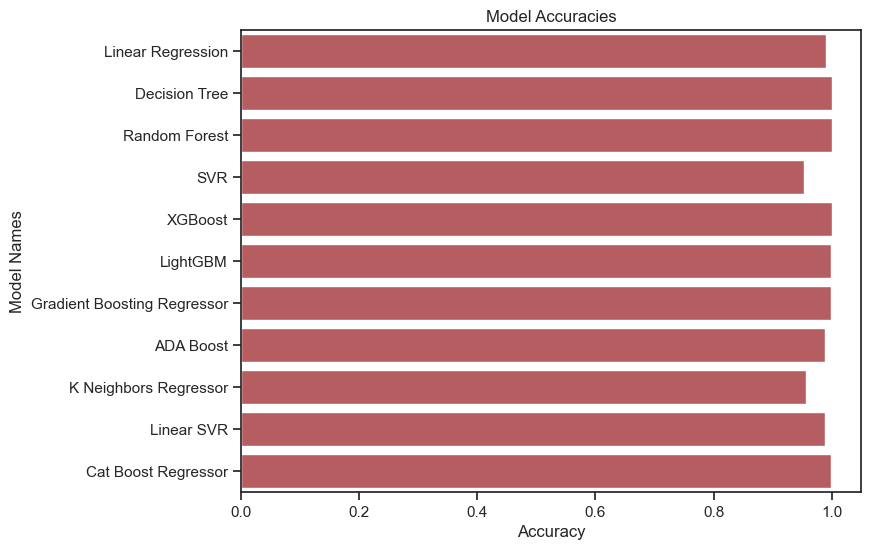

In [32]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

The best value for k neighbors in regression is: 5 with an R-squared score of 0.9570


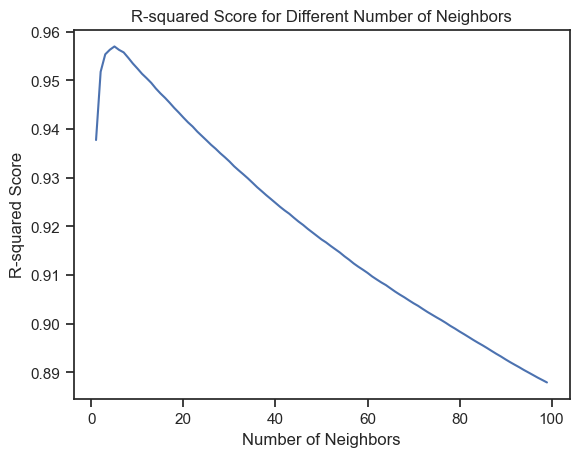

In [33]:
#create a function that checks for the best amount of neighbors
#for predicting continuous variables
#regression version

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def check_neighbors(X_train, y_train, X_test, y_test, k):
    best_score = 0
    best_k = 0
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        
        scores.append(score)
        neighbors.append(i)
        
        if score > best_score:
            best_score = score
            best_k = i
            
    return best_k, best_score, neighbors, scores

best_k, best_score, neighbors, scores = check_neighbors(X_train, y_train, X_test, y_test, 100)
print(f"The best value for k neighbors in regression is: {best_k} with an R-squared score of {best_score:.4f}")

plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()

In [34]:
#copy of df1
df2 = df1.copy()
df2.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Time
0,19,1,9.472,7.389,0.89,14.120,251.0,15.826,1015.13,197,22
1,19,1,9.356,7.228,0.86,14.265,259.0,15.826,1015.63,197,23
2,17,1,9.378,9.378,0.89,3.928,204.0,14.957,1015.94,197,0
3,19,1,8.289,5.944,0.83,14.104,269.0,15.826,1016.41,197,1
4,17,1,8.756,6.978,0.83,11.045,259.0,15.826,1016.51,197,2


In [35]:
#drop temperature column to see how it affects the model
df2.drop(['Temperature (C)'], axis = 1, inplace = True)

In [38]:
#choose target and features
y1 = df2['Apparent Temperature (C)']
X1 = df2.drop(['Apparent Temperature (C)'], axis = 1)

#split data into train and test
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, random_state = 0)


In [39]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy1 = []
for name1, model in models.items():
    model.fit(X_train1, y_train1)
    y_pred1 = model.predict(X_test1)
    
    mse1 = mean_squared_error(y_test1, y_pred1)
    mae1 = mean_absolute_error(y_test1, y_pred1)
    r21 = r2_score(y_test1, y_pred1)
    
    print(f"Results for {name1}:")
    print("Mean Squared Error (MSE):", mse1)
    print("Mean Absolute Error (MAE):", mae1)
    print("R-squared Score:", r21)
    accuracy1.append(r21)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 45.26749859364234
Mean Absolute Error (MAE): 5.469836003544941
R-squared Score: 0.6019072486220629

Results for Decision Tree:
Mean Squared Error (MSE): 48.1033735983661
Mean Absolute Error (MAE): 4.845561292195406
R-squared Score: 0.5769679142592634

Results for Random Forest:
Mean Squared Error (MSE): 23.519296226108928
Mean Absolute Error (MAE): 3.64774574147798
R-squared Score: 0.7931659217759512

Results for SVR:
Mean Squared Error (MSE): 84.78889927275745
Mean Absolute Error (MAE): 7.44053574931578
R-squared Score: 0.2543469984767527

Results for XGBoost:
Mean Squared Error (MSE): 24.394301310862403
Mean Absolute Error (MAE): 3.814402119309105
R-squared Score: 0.7854709266363674

Results for LightGBM:
Mean Squared Error (MSE): 26.32365969789141
Mean Absolute Error (MAE): 3.991363601968969
R-squared Score: 0.7685037070517104

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 30.436459651397698
Mean Absolute 

d:\python\odyn\anak2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Results for Linear SVR:
Mean Squared Error (MSE): 109.14351733949363
Mean Absolute Error (MAE): 8.441284370031555
R-squared Score: 0.04016690865161043

Learning rate set to 0.080531
0:	learn: 10.1611055	total: 5.96ms	remaining: 5.95s
1:	learn: 9.6704395	total: 11.5ms	remaining: 5.75s
2:	learn: 9.2255691	total: 16.7ms	remaining: 5.56s
3:	learn: 8.8360567	total: 21.9ms	remaining: 5.44s
4:	learn: 8.4798916	total: 27ms	remaining: 5.38s
5:	learn: 8.1604724	total: 32ms	remaining: 5.31s
6:	learn: 7.8825450	total: 37ms	remaining: 5.24s
7:	learn: 7.6379756	total: 42.1ms	remaining: 5.21s
8:	learn: 7.4182192	total: 47.4ms	remaining: 5.22s
9:	learn: 7.2156815	total: 52.1ms	remaining: 5.15s
10:	learn: 7.0373679	total: 56.7ms	remaining: 5.1s
11:	learn: 6.8882054	total: 62ms	remaining: 5.1s
12:	learn: 6.7498896	total: 66.7ms	remaining: 5.07s
13:	learn: 6.6280847	total: 71.3ms	remaining: 5.02s
14:	learn: 6.5206534	total: 76.7ms	remaining: 5.03s
15:	learn: 6.4259710	total: 81.5ms	remaining: 5.01s
16:	l

In [40]:
accuracy1

[0.6019072486220629,
 0.5769679142592634,
 0.7931659217759512,
 0.2543469984767527,
 0.7854709266363674,
 0.7685037070517104,
 0.732334802203314,
 0.6247802547512815,
 0.5509976619863179,
 0.04016690865161043,
 0.7874801825169018]

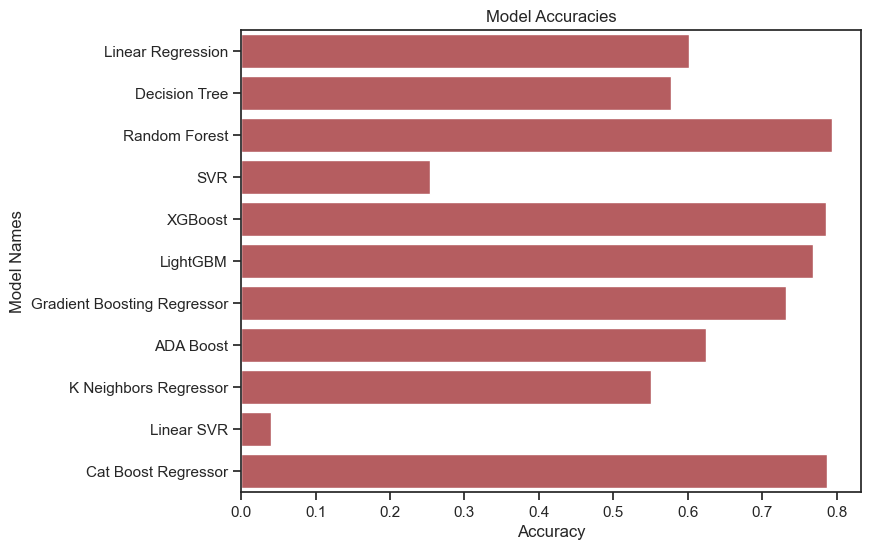

In [41]:
data1 = pd.DataFrame({"Names": Name, "Accuracies": accuracy1})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data1, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

The best value for k neighbors in regression is: 6 with an R-squared score of 0.5542


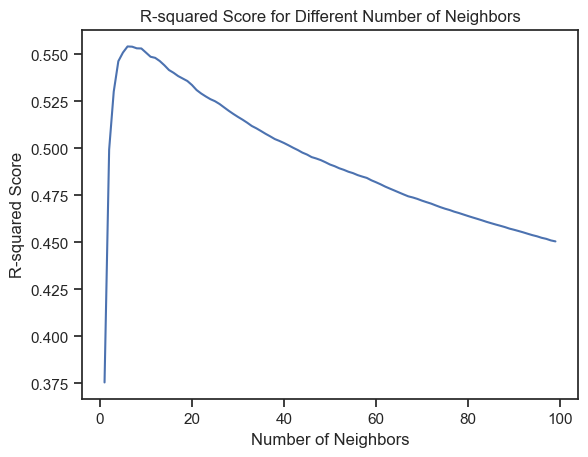

In [42]:
#create a function that checks for the best amount of neighbors
#for predicting continuous variables
#regression version

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def check_neighbors(X_train1, y_train1, X_test1, y_test1, k):
    best_score1 = 0
    best_k1 = 0
    scores1 = []
    neighbors1 = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train1, y_train1)
        score1 = knn.score(X_test1, y_test1)
        
        scores1.append(score1)
        neighbors1.append(i)
        
        if score1 > best_score1:
            best_score1 = score1
            best_k1 = i
            
    return best_k1, best_score1, neighbors1, scores1

best_k1, best_score1, neighbors1, scores1 = check_neighbors(X_train1, y_train1, X_test1, y_test1, 100)
print(f"The best value for k neighbors in regression is: {best_k1} with an R-squared score of {best_score1:.4f}")

plt.plot(neighbors1, scores1)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()